# Ergänzende Fragen
Polung der Detektorspannung an Detektor? --> In Sperrrichtung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log
from scipy.constants import *

In [8]:
# Dicke Verarmungszone bei 40 V? Kapazität? Zahl der Ladungsträger?
d = sqrt(11.68*epsilon_0*1.85e-1*5.25*40)
C = 11.68*epsilon_0*50e-6/d
N = 2*5.5e6/3.62
U = N*e/C
print('Dicke Verarmungszone: ', d)
print('Kapazität: ', C)
print('Zahl Ladungsträger: ', N)
print('Spannungsimpuls: ', U)

Dicke Verarmungszone:  6.338570103295088e-05
Kapazität:  8.15774788068866e-11
Zahl Ladungsträger:  3038674.033149171
Spannungsimpuls:  0.005967936991260823


Definitionen für Bethe-Bloch, etc.:

In [2]:
def beta(v):
    return v/c

def gamma(v):
    return 1.0/sqrt(1-beta(v)*beta(v))

def rel_speed(E,m0):
    # bedenken, dass E hier die kinetische Energie beschreibt;
    # Die Ruhemasse m0c**2 muss auch berücksichtigt werden.
    ayuda = 1.0-1.0/(1.0+E/m0/c/c)**2
    return sqrt(ayuda) * c

def classical_speed(E,m0):
    return sqrt(2.0*E/m0)

def bethe(E,m0,Z,Eb,ne):
    # Energieverlust nach Bethe-Bloch (negatives Vorzeichen schon berücksichtigt)
    v = rel_speed(E,m0)
    #v = classical_speed(E,m0)
    #print(v)
    b = beta(v)
    factor = -Z**2*e**4*ne/4/pi/epsilon_0/epsilon_0/v/v/m_e
    #print('ln-Term',log(2.0*m_e*v**2/Eb))
    #print(log(1-b**2))
    #print(b**2)
    #print(b)
    return factor*(log(2.0*m_e*v**2/Eb)-log(1-b**2)-b**2)

Energieverlust eines Alpha-Teilchens in Goldschicht? Quelle für mean excitation energies: https://www.physics.nist.gov/cgi-bin/Star/compos.pl?ap-text (09.11.2022)

In [3]:
h = 40e-6*1e-2/19.32     # Berechnung Dicke Goldschicht
print('Dicke Goldschicht: ', h)
m_he = 2*m_p+2*m_n  # Masse Helium-Kern
Z = 2               # Ladungszahl Helium
Eb_au = 790.0*e     # mean excitation energy
ne_au = 19.32e3 * 79.0 * N_A/ (196.97 * physical_constants['molar mass constant'][0]) # Berechnung Elektronendichte pro m^3 für Gold über Dichte und atomare Masse
print('mittlere Bindungsenergie Gold in Joule: ', Eb_au)
print('Elektronendichte Gold pro m^3: ', ne_au)

Ekin = 5.4857e6 * e # wahrscheinlichste Teilchenenergie in Joule

energy_loss_au = bethe(Ekin,m_he,Z,Eb_au,ne_au) * h
print('Energieverlust in Goldschicht in eV: ', energy_loss_au/e)

Dicke Goldschicht:  2.070393374741201e-08
mittlere Bindungsenergie Gold in Joule:  1.26571954086e-16
Elektronendichte Gold pro m^3:  4.666432960547197e+30
Energieverlust in Goldschicht in eV:  -8973.128999434275


Reichweite eines Alpha-Teilchens in Silizium? Nutze wahrscheinlichste kinetische Energie minus Energieverlust in Gold.

In [6]:
Ekin2 = Ekin - energy_loss_au
x = 0.0
dx = 1e-8  # Schrittweite 10 nm
energy = [Ekin2]
path = [x]

Eb_si = 173.0*e     # mean excitation energy
#ne_si = 2.336*1e3* 14/(28*m_p)
ne_si = 2.336e3 * 14.0 * N_A/ (28.085 * physical_constants['molar mass constant'][0]) # Berechnung Elektronendichte pro m^3 für Silizium über Dichte und atomare Masse

while Ekin2 > 0.0:
    if bethe(Ekin2,m_he,Z,Eb_si,ne_si) > 0.0:
        break
    dE = bethe(Ekin2,m_he,Z,Eb_si,ne_si) * dx
    print(dE)
    Ekin2 = Ekin2 + dE
    x = x + dx
    energy.append(Ekin2)
    path.append(x)

energy = np.array(energy)
path = np.array(path)

-2.235129891642415e-16
-2.235497356583427e-16
-2.2358650182347253e-16
-2.23623287677395e-16
-2.236600932379208e-16
-2.2369691852288066e-16
-2.2373376355012474e-16
-2.237706283375286e-16
-2.238075129030097e-16
-2.238444172644442e-16
-2.238813414398279e-16
-2.239182854470988e-16
-2.239552493042757e-16
-2.239922330293199e-16
-2.240292366403234e-16
-2.240662601553148e-16
-2.241033035923875e-16
-2.2414036696962107e-16
-2.2417745030519346e-16
-2.242145536172024e-16
-2.242516769238547e-16
-2.24288820243344e-16
-2.243259835938788e-16
-2.2436316699369845e-16
-2.2440037046110763e-16
-2.244375940143586e-16
-2.2447483767177973e-16
-2.245121014517087e-16
-2.2454938537250345e-16
-2.2458668945257044e-16
-2.246240137102749e-16
-2.2466135816409776e-16
-2.2469872283244543e-16
-2.247361077338118e-16
-2.247735128867339e-16
-2.2481093830968543e-16
-2.248483840212503e-16
-2.2488585004000516e-16
-2.2492333638453604e-16
-2.249608430734555e-16
-2.249983701254416e-16
-2.250359175591151e-16
-2.250734853932123e-1

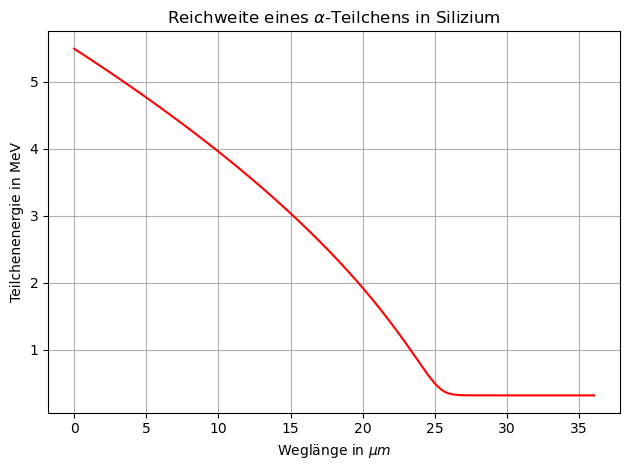

In [13]:
# rechne path und in energy vor dem Plotten in micrometer und eV zurück.
plt.plot(path*1e6,energy/e*1e-6,color='red')
plt.title(r'Reichweite eines $\alpha$-Teilchens in Silizium')
plt.xlabel(r'Weglänge in $\mu m$')
plt.ylabel('Teilchenenergie in MeV')
plt.grid()
plt.tight_layout()
plt.savefig('plots/reichweite_alpha_silizium.pdf')